# NumPy: Broadcasting
Neste tópico, propomos o estudo do pacote `NumPy`, cujo objetivo é fornecer suporte para arrays multidimensionais, que possuem implementações prontas para operações básicas e funções de algebra linear extremamente úteis. Este pacote é a base de grande parte dos pacotes do Python que serão futuramente estudados. A implementação deste pacote é feita através de C, logo, ele é extremamente otimizado (devido a tipagém estática e uso de memória contigua), sendo ótimo para carregar, armazenear, e manipular dados dentro de memória no Python.

## Broadcasting
Até então, analisamos como se utilizar as UFuncs para realizar a vetorização de operações. Uma outra forma de vetorizar operações é através do broadcasting, que é um conjunto de regros para aplicar UFuncs binárias em arrays de tamanho diferente. 

Como vimos anteriormente, operações binárias são realizadas elemento a elemento para pares de array. O broadcasting nos permite realizar estas mesma operações com arrays que não são do mesmo tamanho. Por exemplo, ao somar um valor numérico ao array, sabemos que o que "parece" ocorrer é a criação de um array do tamanho do primeiro, preenchendo todas posições com o valor, e somando os dois arrays. O broadcasting permite este tipo deoperação.

In [20]:
import numpy as np
x = np.arange(1,4)
print(x)
print(x+5)

[1 2 3]
[6 7 8]


Algo semelhante ocorre quando aumentamos o numero de dimensões. Ao somar um array de uma só dimensão a um de duas dimensões, a operação é repetida ao longo da dimensão que o array não possuí. Logo, no exemplo abaixo, o broadcasting causa a adição do array ao longo das várias linhas da matriz. 

In [21]:
y = np.ones((3,3))
print(x + y)

[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


Estes dois exemplos são mais simples, mas há situações mais complexas, como demonstrado abaixo. 

In [22]:
x = np.arange(1,4)
y = np.arange(1,4)[:,np.newaxis]
print(x)
print(y)

[1 2 3]
[[1]
 [2]
 [3]]


Neste caso, ao somar os dois valores, através do broadcasting, a matriz 1x3 é transformada em uma matriz 3x3 composta por uma linha de 1's, outra de 2's e a ultima de 3's. Assim, é possível somar o array unidimensional ao longo das linhas. 

In [23]:
x + y

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

## Regras para Broadcasting
Há três regras seguidas para realizar o broadcasting. 
* 1. Se dois arrays possuem quantidade de dimensões diferentes, o shape daquele com menos dimensões é completado com 1 a esquerda. 
* 2. Se o shape de dois arrays não forem de mesmo tamanho em qualquer dimensão, aquele array com tamanho igual 1 é usado para preencher o resto da dimensão.
* 3. Se qualquer tamanho de dimensões não forem iguais entre arrays, e tiverem tamanho maior que 1, um erro é gerado. 

Demonstramos o funcionamento destas regras através de exemplos. 

### Exemplo 1: Somando um array 1D com um 2D.

In [24]:
x = np.ones((2,3))
print(x)
y = np.arange(3)
print(y)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


Pela regra 1, como ao longo das linhas y não possuí dimensao, a dimensão a esquerda é criada com valor 1.

In [25]:
y1 = y[np.newaxis,:]
print(np.shape(y1),"\n",y1)

(1, 3) 
 [[0 1 2]]


Agora, apesar de termos a mesma quantidade de dimensões, é necessário cumprir a regra 2. Como os valores não são iguais, precisamos preencher a nova dimensão repetindo o primeiro valor da dimensão ao longo da dimensão.

In [26]:
y1 = np.vstack([y1,y1])
print(y1)

[[0 1 2]
 [0 1 2]]


Como os shapes agora batem, e a regra 3 não se encaixa na situação, podemos agora realizar operações entre os dois arrays. Comparamos os resultados sem realizar esses passos (logo o Broadcasting trata o cumprimento das regras) e após realizar os passos, e vêmos que os resultados são iguais. 

In [27]:
x + y

array([[1., 2., 3.],
       [1., 2., 3.]])

In [28]:
x + y1

array([[1., 2., 3.],
       [1., 2., 3.]])

### Exemplo 2: Broadcasting de ambos arrays
No exemplo abaixo, demonstramos em uma situação em que ambos os arrays precisam ser manipulados pelo broadcasting para ser possível realizar a operação.

In [29]:
x = np.arange(3).reshape(3,1)
y = np.arange(3)
print(x)
print(y)

[[0]
 [1]
 [2]]
[0 1 2]


Primeiro, temos que Y possuí uma dimensão a menos, logo, para cumprir a regra 1, é adicionada uma dimensão a esquerda no shape. 

In [30]:
print("Shape X: ", np.shape(x), "Shape Y: ",np.shape(y))
y1 = y[np.newaxis,:]
print("Shape X: ", np.shape(x), "Shape Y: ",np.shape(y1))

Shape X:  (3, 1) Shape Y:  (3,)
Shape X:  (3, 1) Shape Y:  (1, 3)


Em segundo lugar, devemos cumprir a regra 2, onde a nova dimensão adicionada deve ser preenchida com a extensão do array. Note que além de realizar para um array, precisamos realizar paro o outro também.

In [31]:
print("Shape X: ", np.shape(x), "Shape Y: ",np.shape(y1))
y1 = np.vstack([y1,y1,y1])
print("Shape X: ", np.shape(x), "Shape Y: ",np.shape(y1))
x1 = np.hstack([x,x,x])
print("Shape X: ", np.shape(x1), "Shape Y: ",np.shape(y1))

Shape X:  (3, 1) Shape Y:  (1, 3)
Shape X:  (3, 1) Shape Y:  (3, 3)
Shape X:  (3, 3) Shape Y:  (3, 3)


Como conseguimos cumprir os dois acsos, então, podemos finalmente somar os valores.

In [32]:
y1 + x1

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [33]:
x +y

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Exemplo 3: Arrays Incompátiveis
Por ultimos, análisamos um caso em que temos um erro gerado, já que os arrays não são compátiveis para realizar o broadcasting.

In [34]:
x = np.ones((3,2))
y = np.arange(3)

Primeiro, precisamos adicionar uma dimensão ao Y para cumprir a primeira regra.

In [35]:
print("Shape X: ", np.shape(x), "Shape Y: ",np.shape(y))
y1 = y[np.newaxis,:]
print("Shape X: ", np.shape(x), "Shape Y: ",np.shape(y1))

Shape X:  (3, 2) Shape Y:  (3,)
Shape X:  (3, 2) Shape Y:  (1, 3)


Então, precisamos preencher a nova dimensão de Y repetindo o array 3 vezes para igualar o tamanho da dimensão em X. Entretanto, Não podemos fazer isto para a outra dimensão de X, já que ela não é 1.

In [36]:
print("Shape X: ", np.shape(x), "Shape Y: ",np.shape(y1))
y1 = np.vstack([y1,y1,y1])
print("Shape X: ", np.shape(x), "Shape Y: ",np.shape(y1))

Shape X:  (3, 2) Shape Y:  (1, 3)
Shape X:  (3, 2) Shape Y:  (3, 3)


Neste caso, caímos pela regra 3, e é necessário gerar um erro, como visto acontecendo abaixo.

In [37]:
x + y

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## Aplicando Broadcasting

As aplicações de broadcasting podem facilitar a vida em inúmeras situações. Abaixo, demonstramos algumas. 

### Centralização de um Array
A centralização de um Array consiste em centralizar um array. A centralização de um array é a tarefa de reescrever os valores dos elementos, realizando a subtração pela média do array em todas posições. Para realizar esta tarefa, podemos utilizar broadcasting para utilizar o valor numérico da média e subtrair o valor em todas as posições.

In [38]:
x = np.random.random((10,3))
x_med = x.mean(0)
print(x,"\n",x_med)

[[0.02153373 0.6016236  0.8011604 ]
 [0.47731305 0.74487241 0.15155993]
 [0.89109918 0.56603375 0.20928175]
 [0.01344295 0.69270572 0.35332013]
 [0.41811496 0.98146517 0.72207892]
 [0.31730574 0.62051661 0.03329391]
 [0.4653743  0.838652   0.08917189]
 [0.5784924  0.94500746 0.75267011]
 [0.22826343 0.71877555 0.11379356]
 [0.12022178 0.55955892 0.52517407]] 
 [0.35311615 0.72692112 0.37515047]


In [39]:
x = x - x_med
print(x)

[[-0.33158242 -0.12529752  0.42600993]
 [ 0.1241969   0.01795129 -0.22359053]
 [ 0.53798303 -0.16088737 -0.16586871]
 [-0.3396732  -0.0342154  -0.02183034]
 [ 0.06499881  0.25454405  0.34692845]
 [-0.03581042 -0.10640451 -0.34185656]
 [ 0.11225815  0.11173088 -0.28597858]
 [ 0.22537624  0.21808634  0.37751964]
 [-0.12485272 -0.00814557 -0.2613569 ]
 [-0.23289437 -0.1673622   0.1500236 ]]


Podemos conferir que a centralização deu certo pois a média de array centralizado deve ser zero. 

In [40]:
x.mean(0)

array([ 8.88178420e-17, -8.88178420e-17, -1.11022302e-17])

### Plotando uma função bi-dimensional
O broadcasting é extremamente útil para plotar funções bidimensionais(do tipo $z = f(x,y)$ ), para computar a função ao longo de uma malha. Primeiro definimos um array x que cresce horizontalmente e um array y que cresce verticalmente. Então definimos uma função que depende dos dois vetores, e gera um valor numérico para cada "par" entre dois valores dentro dos dois vetores.

In [41]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y*x) * np.cos(x)

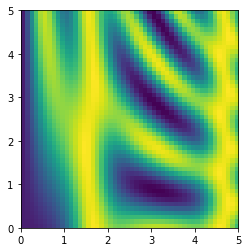

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0,5,0,5], cmap='viridis')